In [ ]:
!pwd

/content


In [ ]:
!unzip '/content/IMDB Dataset.csv.zip'

Archive:  /content/IMDB Dataset.csv.zip
  inflating: IMDB Dataset.csv        


In [ ]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import os
print(os.listdir("../content"))
import warnings
warnings.filterwarnings('ignore')

['.config', 'sample_data']


In [ ]:
#importing the training data
imdb_data=pd.read_csv('../content/IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Summary of the dataset
imdb_data.describe()

review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

In [ ]:
#sentiment count
imdb_data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [ ]:
#split the dataset
#train dataset
train_reviews=imdb_data.review[:40000]
train_sentiments=imdb_data.sentiment[:40000]
#test dataset
test_reviews=imdb_data.review[40000:]
test_sentiments=imdb_data.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)


(40000,) (40000,)
(10000,) (10000,)


In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)


True

In [ ]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)

NameError: name 'imdb_data' is not defined

In [ ]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

In [ ]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)


In [ ]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

{'into', 'yourself', 'when', 'no', 're', 'about', "isn't", 'myself', 'where', 'aren', 'on', 'after', 'below', 'few', 'why', 'ma', 'we', 'haven', 'wouldn', 'mustn', 'not', 'our', 'too', 'o', 'these', 'ain', 'shouldn', 'you', "that'll", 'from', "needn't", 'has', 'once', 'having', 'him', 'of', 'do', 's', 'doing', 'hadn', "it's", 'there', 'through', 'off', "you're", 'in', 'further', 'won', 'more', 'each', 'your', 'ourselves', 'll', 'me', 'what', 'before', 't', 'it', 'didn', 'very', 'own', 'they', 'yourselves', 'so', 'such', 'above', 'will', 'himself', 'ours', 'herself', 'both', 'yours', 'with', 'weren', 'under', "won't", 'his', 'did', 'by', 'who', 'being', 'd', 'which', 'only', 'same', 'most', 'wasn', 'had', 'my', "she's", 'those', 'was', "didn't", 'up', "hasn't", 'its', 'she', 'an', 'any', 'down', 'have', 'over', 'a', 'until', 'other', 'here', 'does', 'hers', 'should', 'between', 'y', 'if', 'can', 'are', 'during', 'hasn', 'couldn', 'them', 'their', 'because', "mustn't", "aren't", 'while',

In [ ]:
#normalized train reviews
norm_train_reviews=imdb_data.review[:40000]
norm_train_reviews[0]
#convert dataframe to string
#norm_train_string=norm_train_reviews.to_string()
#Spelling correction using Textblob
#norm_train_spelling=TextBlob(norm_train_string)
#norm_train_spelling.correct()
#Tokenization using Textblob
#norm_train_words=norm_train_spelling.words
#norm_train_words

'one review ha mention watch 1 oz episod youll hook right thi exactli happen meth first thing struck oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

In [ ]:
#Normalized test reviews
norm_test_reviews=imdb_data.review[40000:]
norm_test_reviews[45005]
##convert dataframe to string
#norm_test_string=norm_test_reviews.to_string()
#spelling correction using Textblob
#norm_test_spelling=TextBlob(norm_test_string)
#print(norm_test_spelling.correct())
#Tokenization using Textblob
#norm_test_words=norm_test_spelling.words
#norm_test_words

'read review watch thi piec cinemat garbag took least 2 page find somebodi els didnt think thi appallingli unfunni montag wasnt acm humour 70 inde ani era thi isnt least funni set sketch comedi ive ever seen itll till come along half skit alreadi done infinit better act monti python woodi allen wa say nice piec anim last 90 second highlight thi film would still get close sum mindless drivelridden thi wast 75 minut semin comedi onli world semin realli doe mean semen scatolog humour onli world scat actual fece precursor joke onli mean thi handbook comedi tit bum odd beaver niceif pubesc boy least one hand free havent found playboy exist give break becaus wa earli 70 way sketch comedi go back least ten year prior onli way could even forgiv thi film even made wa gunpoint retro hardli sketch clown subtli pervert children may cut edg circl could actual funni come realli quit sad kept go throughout entir 75 minut sheer belief may save genuin funni skit end gave film 1 becaus wa lower scoreand

In [ ]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (40000, 6209089)
BOW_cv_test: (10000, 6209089)


In [ ]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6209089)
Tfidf_test: (10000, 6209089)


In [ ]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [ ]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)


[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [ ]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [ ]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


In [ ]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)


lr_bow_score : 0.7512
lr_tfidf_score : 0.75


In [ ]:
#Classification report for bag of words
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.74      0.77      0.75      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)


[[3768 1239]
 [1249 3744]]
[[3663 1344]
 [1156 3837]]


In [ ]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


In [ ]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 1 0 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [ ]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)


svm_bow_score : 0.5829
svm_tfidf_score : 0.5112


In [ ]:
#Classification report for bag of words
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.94      0.18      0.30      4993
    Negative       0.55      0.99      0.70      5007

    accuracy                           0.58     10000
   macro avg       0.74      0.58      0.50     10000
weighted avg       0.74      0.58      0.50     10000

              precision    recall  f1-score   support

    Positive       1.00      0.02      0.04      4993
    Negative       0.51      1.00      0.67      5007

    accuracy                           0.51     10000
   macro avg       0.75      0.51      0.36     10000
weighted avg       0.75      0.51      0.36     10000



In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[4948   59]
 [4112  881]]
[[5007    0]
 [4888  105]]


In [ ]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [ ]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


In [ ]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.751
mnb_tfidf_score : 0.7509


In [ ]:
#Classification report for bag of words
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.74      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)


[[3736 1271]
 [1219 3774]]
[[3729 1278]
 [1213 3780]]


<function matplotlib.pyplot.show(close=None, block=None)>

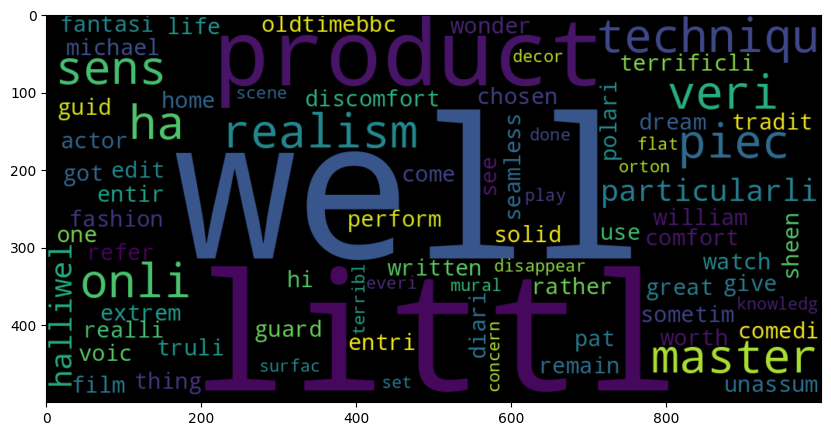

In [ ]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

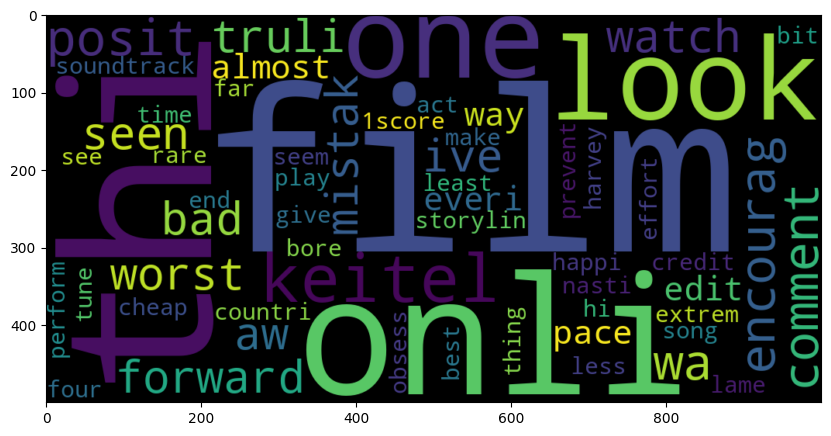

In [ ]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
### reading dataset
imdb_data=pd.read_csv('../content/IMDB Dataset.csv')

reviews = df_imdb["review"]
sentiments = df_imdb["sentiment"]

### Dividing into train and test
reviews_train, reviews_test, sentiments_train, sentiments_test = train_test_split(reviews, sentiments,
                                   random_state=8933,
                                   test_size=0.20,
                                   shuffle=True)


FileNotFoundError: [Errno 2] No such file or directory: '../content/IMDB Dataset.csv'

In [ ]:
!pwd

/content


In [ ]:
!unzip 'IMDB Dataset.csv.zip'

Archive:  IMDB Dataset.csv.zip
  inflating: IMDB Dataset.csv        


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
### reading dataset
df_imdb = pd.read_csv("/content/IMDB Dataset.csv.zip")

reviews = df_imdb["review"]
sentiments = df_imdb["sentiment"]

### Dividing into train and test
reviews_train, reviews_test, sentiments_train, sentiments_test = train_test_split(reviews, sentiments,
                                   random_state=8933,
                                   test_size=0.20,
                                   shuffle=True)


In [ ]:
### Extracting reviews into a list of reviews
reviews_list_train = list(reviews_train)
reviews_list_train

['If you fast forward through the horrible singing, you will find a classic fairy tale underneath. Christopher Walken is very humorous and surprisingly good in the role. His trademark style of acting works well for the sly Puss in Boots. The other actors are well for their parts. I did not find any of the acting terribly fake or awkward. The king in particular appears a real dunce though, and I wonder if he is supposed to be. I can not remember the original tale. The special effects are typical of the eighties, but at least they are not overly fake like some of the computer generated fare that we see today. Overall, I recommend this movie for children and adults who are a child at heart.',
 "Unbelievable!<br /><br />this film gets a 7 out 0f 10. This has to be one of the worst films i have seen in years. not only was the acting incredibly bad, the storyline (if you can call it that) was just as bad. Offcourse everyone knows what's going to happen within the first 5 minutes. Which is no

In [ ]:
pip install gensim


In [ ]:
import gensim

In [ ]:
### simple_preprocess does basic pre-processing such as tokenization, lowercasing, etc. and returns back a list of tokens (words).
### Contrary to BOW, it has been found that little to no preprocessing performs best for word2vec.
for i in range(len(reviews_list_train)):
    reviews_list_train[i] = gensim.utils.simple_preprocess(reviews_list_train[i])


In [ ]:
imdb_model = gensim.models.Word2Vec(reviews_list_train, vector_size=100, window=5, min_count=5, sg=1, workers=10)
imdb_model.train(reviews_list_train, total_examples=len(reviews_list_train), epochs=10)

(67357514, 89549360)

In [ ]:
### Creating embeddings for each train review by averaging the embeddings of words in that review
review2vec = []
for i in range(len(reviews_list_train)):
    review_vector = []
    for word in reviews_list_train[i]:
        if word in imdb_model.wv:
            review_vector.append(imdb_model.wv[word])
    review2vec.append(np.mean(review_vector, axis=0))

review2vec

[array([-1.52614355e-01,  1.82704642e-01,  4.76597995e-02, -3.71683650e-02,
         1.89158451e-02, -2.22706184e-01,  9.17373821e-02,  4.20723885e-01,
         4.78188172e-02, -8.25163499e-02, -1.69393450e-01, -1.67745352e-01,
        -2.63405684e-02,  1.32927462e-01,  4.72420007e-02, -7.56600797e-02,
         7.28376955e-02, -1.60212591e-01, -8.66384134e-02, -3.26957285e-01,
         1.15204185e-01,  1.21096492e-01,  1.69893503e-01, -1.39628723e-01,
         4.44758311e-02,  1.03998080e-01, -1.40966028e-01, -1.11432495e-02,
        -1.91361472e-01,  4.74125780e-02,  1.24809541e-01, -1.07335530e-01,
         2.89046541e-02, -2.43087783e-01, -5.96908964e-02,  4.86197732e-02,
        -5.48693724e-02, -7.96227232e-02, -8.32820088e-02, -2.67720282e-01,
         4.23095487e-02, -1.52568206e-01, -1.05037592e-01,  6.93298690e-03,
         1.32152617e-01, -8.99632201e-02, -1.29774675e-01, -6.03161342e-02,
         1.36341408e-01,  9.10287797e-02,  2.71054339e-02,  3.01036648e-02,
         2.8

In [ ]:
len(review2vec) == len(reviews_list_train)

True

In [ ]:
reviews_list_test = list(reviews_test)

for i in range(len(reviews_list_test)):
    reviews_list_test[i] = gensim.utils.simple_preprocess(reviews_list_test[i])

In [ ]:
### Creating embeddings for each test review by averaging the embeddings of words in that review
review2vec_test = []
for i in range(len(reviews_list_test)):
    review_vector = []
    for word in reviews_list_test[i]:
        if word in imdb_model.wv:
            review_vector.append(imdb_model.wv[word])
    review2vec_test.append(np.mean(review_vector, axis=0))

review2vec_test

[array([-0.08818842,  0.20930044,  0.05289726,  0.01403577,  0.0171437 ,
        -0.25212955,  0.11999706,  0.41312554,  0.00233183, -0.10219093,
        -0.11219873, -0.07010826, -0.11495798,  0.12230533,  0.0699854 ,
        -0.08905811,  0.00848166, -0.11560751, -0.041857  , -0.33859777,
         0.1041513 ,  0.10936325,  0.06082178, -0.10557899,  0.09932116,
         0.06337231, -0.17120048, -0.00914432, -0.21678863,  0.03786598,
         0.11631274, -0.03758126, -0.01939491, -0.15678047,  0.0047176 ,
         0.0141827 ,  0.01665277, -0.0810909 , -0.0940785 , -0.29083553,
         0.03271857, -0.08217262, -0.14710699, -0.01164006,  0.11132128,
        -0.13140318, -0.21646024,  0.01573692,  0.17802727,  0.13263492,
        -0.00920462, -0.04602859,  0.00075101,  0.02457996, -0.03068327,
         0.07690589,  0.15364257, -0.06604794, -0.09614214,  0.06352687,
         0.14556946, -0.13918833,  0.08593558, -0.00421513, -0.13278745,
         0.20290215,  0.03970765, -0.02128138, -0.1

In [ ]:
print(len(review2vec_test))
print(len(review2vec_test) == len(reviews_list_test))

10000
True


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
### Label encoding the output variable
lb = LabelEncoder()
y_train = lb.fit_transform(sentiments_train)

In [ ]:
### Fitting a Logistic Regression
clf = LogisticRegression()
clf.fit(review2vec, y_train)

LogisticRegression()

In [ ]:
### Predicting y based on test set
y_pred = clf.predict(review2vec_test)

In [ ]:
### Encoding y-test
y_test = lb.fit_transform(sentiments_test)

In [ ]:
### getting the accuracy score
score = accuracy_score(y_test, y_pred)
print(score)

0.8682


In [ ]:
### Alternate way to get test accuracy score
score_test_100 = clf.score(review2vec_test, y_test)
print(f"Test Accuracy Score: {score_test_100}")

Test Accuracy Score: 0.8682


In [ ]:
### Alternate way to get train accuracy score
score_train_100 = clf.score(review2vec, y_train)
print(f"Train Accuracy Score: {score_train_100}")

Train Accuracy Score: 0.873325


In [ ]:
### Recreate word embeddings using a word2vec model with size argument 50
imdb_model_50 = gensim.models.Word2Vec(reviews_list_train, vector_size=50, window=5, min_count=5, sg=1, workers=10)
imdb_model_50.train(reviews_list_train, total_examples=len(reviews_list_train), epochs=10)

(67360063, 89549360)

In [ ]:
### Creating embeddings for each train review by averaging the embeddings of words in that review
review2vec_50 = []
for i in range(len(reviews_list_train)):
    review_vector = []
    for word in reviews_list_train[i]:
        if word in imdb_model_50.wv:
            review_vector.append(imdb_model_50.wv[word])
    review2vec_50.append(np.mean(review_vector, axis=0))

review2vec_50

[array([-0.04502572,  0.02888275, -0.09876443,  0.04822128, -0.07074466,
        -0.07895604,  0.36432904,  0.35404822, -0.14222588, -0.01473681,
         0.03514156, -0.21202785,  0.18730392,  0.15618704, -0.20292553,
         0.13328263,  0.12373219,  0.10179872, -0.23240699, -0.29557702,
         0.19700089,  0.3035857 ,  0.508721  ,  0.1420458 ,  0.12291871,
         0.26171896, -0.09759387,  0.05203057, -0.1941496 ,  0.02813092,
         0.16873288, -0.04906947,  0.10251272, -0.16333832, -0.11788233,
         0.01589618,  0.28291416,  0.10275935,  0.0281649 ,  0.05285264,
         0.10747194, -0.06905726,  0.02719728,  0.10234751,  0.23364265,
        -0.0738782 , -0.07666818,  0.00379306,  0.20713945, -0.12823078],
       dtype=float32),
 array([ 1.34229660e-04, -1.01299603e-02, -1.38922468e-01, -2.51674000e-02,
        -1.33338764e-01, -4.40182090e-02,  2.98404157e-01,  3.07101518e-01,
        -2.30538398e-01,  4.33811918e-02,  3.21457088e-02, -2.17499912e-01,
         2.5181895